In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
import scipy

In [2]:
style.use('ggplot')

In [3]:
#start and stop times for the analysis
#from IPO to present
start = dt.datetime(2017,11,10)
end = dt.datetime(2021,2,5)

In [4]:
df = web.DataReader('PLL', 'yahoo', start, end)

In [5]:
#check out the data using .head()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,15.710000,15.710000,15.710000,15.710000,200,15.710000
2018-01-03,17.650000,17.230000,17.230000,17.590000,2300,17.590000
2018-01-04,18.110001,17.750000,17.750000,18.110001,2600,18.110001
2018-01-05,17.209999,16.764999,17.059999,17.209999,1600,17.209999
2018-01-08,17.320000,17.059999,17.320000,17.059999,600,17.059999


In [6]:
#read into a csv then make further modifications to enable indexing 
df.to_csv('pll.csv')
df = pd.read_csv('pll.csv', parse_dates = True, index_col = 0)

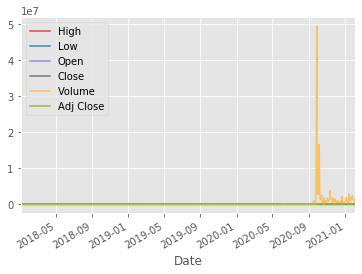

In [7]:
#we can plot the entire df, but this isn't useful because volume
#is drastically higher than the other values
df.plot()

Text(0, 0.5, 'Stock Price USD')

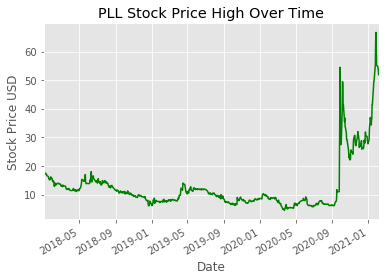

In [8]:
df['High'].plot(color = 'g')
plt.title('PLL Stock Price High Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Stock Price USD')

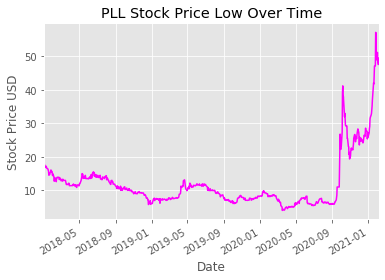

In [9]:
df['Low'].plot(color = 'magenta')

plt.title('PLL Stock Price Low Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Stock Price USD')

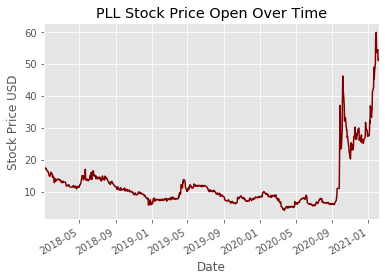

In [10]:
df['Open'].plot(color = 'maroon')

plt.title('PLL Stock Price Open Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Stock Price USD')

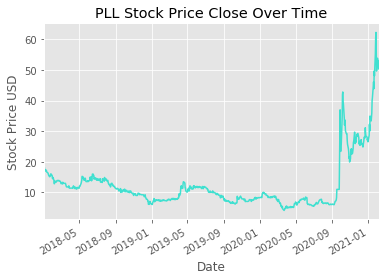

In [11]:
df['Close'].plot(color = 'turquoise')

plt.title('PLL Stock Price Close Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Volume')

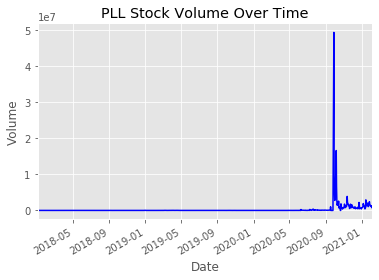

In [12]:
df['Volume'].plot(color = 'blue')

plt.title('PLL Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

In [13]:
'''
Now, let's consider looking at the Moving Average
'''

#rolling mean
close = df['Adj Close']
mavg = close.rolling(window=100).mean()

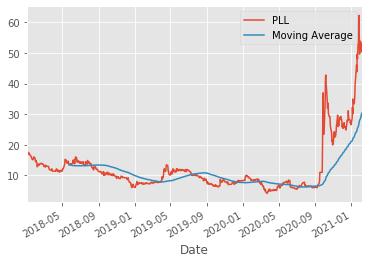

In [14]:
close.plot(label = 'PLL')
mavg.plot(label = 'Moving Average')
plt.legend()

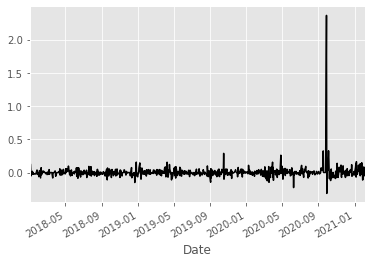

In [15]:

'''
Finding the return deviation
This is important for understanding the risk and return associated with PLL
'''

returnDeviation = close/close.shift(1)-1

returnDeviation.plot(color = 'black')

In [18]:
'''
PLL signed a contract with Tesla back in October 2020, so let's evaluation 
the correlation between these two companies
'''

tesla = web.DataReader(['TSLA', 'PLL'], 'yahoo',start,end)

In [19]:
#get just the adjusted close
teslaAC = tesla['Adj Close']

In [26]:
#conducting correlation analysis
rD = teslaAC.pct_change()
corr = rD.corr()

Text(0, 0.5, 'PLL Returns')

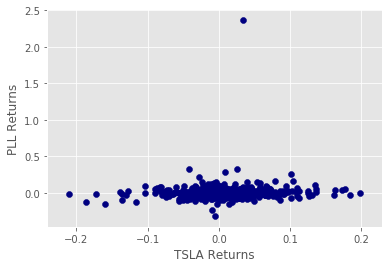

In [27]:
plt.scatter(rD.TSLA, rD.PLL, color = 'navy')
plt.xlabel('TSLA Returns')
plt.ylabel('PLL Returns')

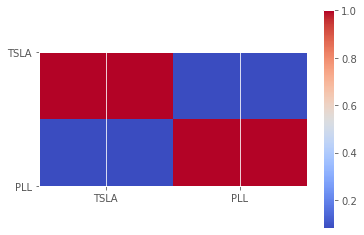

In [28]:
#heat map showing the different correlations with color
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

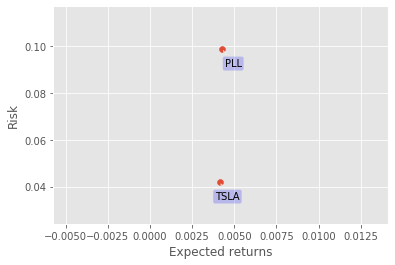

In [29]:
#going back to risk and returns
plt.scatter(rD.mean(), rD.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rD.columns, rD.mean(), rD.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.2', fc = 'blue', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [30]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,15.710000,15.710000,15.710000,15.710000,200,15.710000
2018-01-03,17.650000,17.230000,17.230000,17.590000,2300,17.590000
2018-01-04,18.110001,17.750000,17.750000,18.110001,2600,18.110001
2018-01-05,17.209999,16.764999,17.059999,17.209999,1600,17.209999
2018-01-08,17.320000,17.059999,17.320000,17.059999,600,17.059999


In [32]:
#Bollinger Bands
df['middle_band'] = df['Close'].rolling(window=20).mean()
df['upper_band'] = df['Close'].rolling(window=20).mean() + df['Close'].rolling(window=20).std()*2
df['lower_band'] = df['Close'].rolling(window=20).mean() - df['Close'].rolling(window=20).std()*2

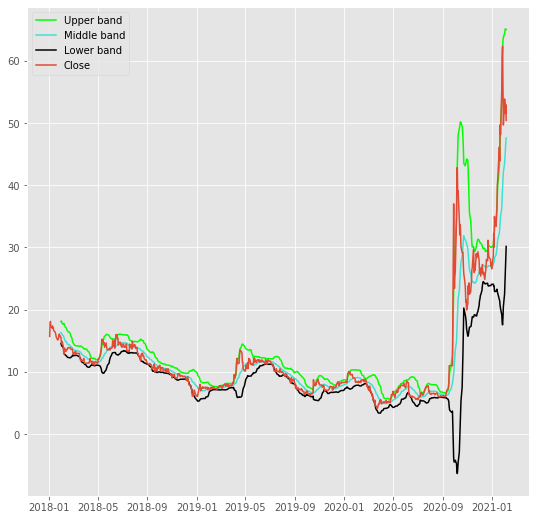

In [39]:
plt.figure(figsize=(9,9))
plt.plot(df['upper_band'], 'lime', label="Upper band")
plt.plot(df['middle_band'], 'turquoise', label="Middle band")
plt.plot(df['lower_band'], 'black', label="Lower band")
plt.plot(df['Close'], label="Close")
plt.legend()
plt.show()

In [40]:
import plotly.graph_objects as go

In [60]:
df = web.DataReader('PLL', 'yahoo', start, end)

In [68]:
#read into a csv then make further modifications to enable indexing 
df.to_csv('pll.csv')
df = pd.read_csv('pll.csv', parse_dates = True)

In [69]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,15.710000,15.710000,15.710000,15.710000,200,15.710000
1,2018-01-03,17.650000,17.230000,17.230000,17.590000,2300,17.590000
2,2018-01-04,18.110001,17.750000,17.750000,18.110001,2600,18.110001
3,2018-01-05,17.209999,16.764999,17.059999,17.209999,1600,17.209999
4,2018-01-08,17.320000,17.059999,17.320000,17.059999,600,17.059999


In [70]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()